## AUDIO EXERCISE
**Nama : Ihya Razky Hidayat**

**NIM  : 122140167**


In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

## Soal 1: Rekaman dan Analisis Suara Multi-Level

In [ ]:
audio_path = "Audio1.wav"
y, sr = librosa.load(audio_path, sr=None)

In [4]:
print(f"Durasi: {librosa.get_duration(y=y, sr=sr):.2f} detik")
print(f"Sample rate: {sr} Hz")
Audio(y, rate=sr)

Durasi: 27.37 detik
Sample rate: 48000 Hz


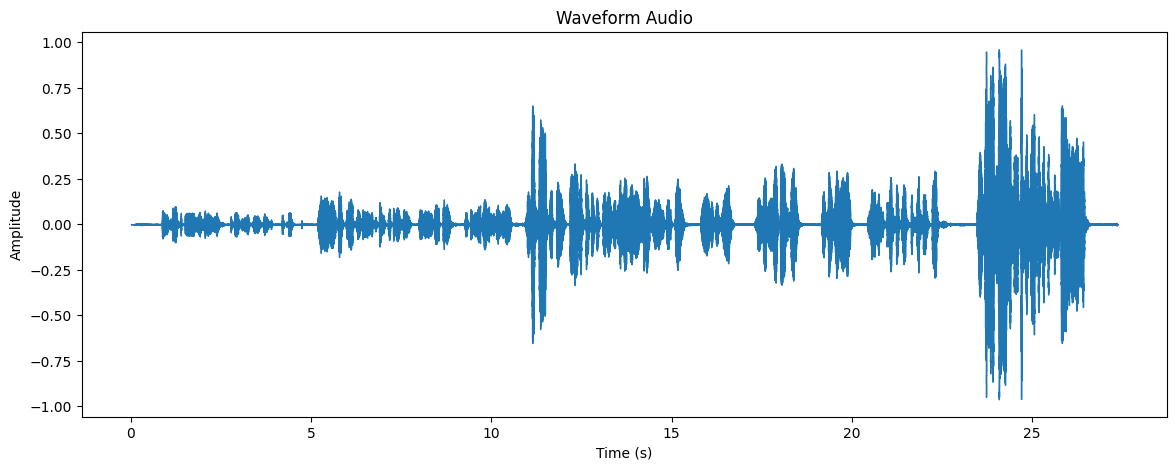

In [5]:
#visualisasi waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


Waveform menunjukkan peningkatan amplitudo secara bertahap setiap sekitar lima detik, yang menandakan perubahan tingkat kekuatan suara dari bisikan, suara normal, keras, cempreng, hingga teriakan. Bagian awal rekaman memiliki amplitudo yang sangat kecil, lalu meningkat secara signifikan di bagian tengah, dan mencapai puncak amplitudo pada segmen akhir. Pola ini menggambarkan variasi volume dan energi suara yang sesuai dengan instruksi perekaman multi-level.

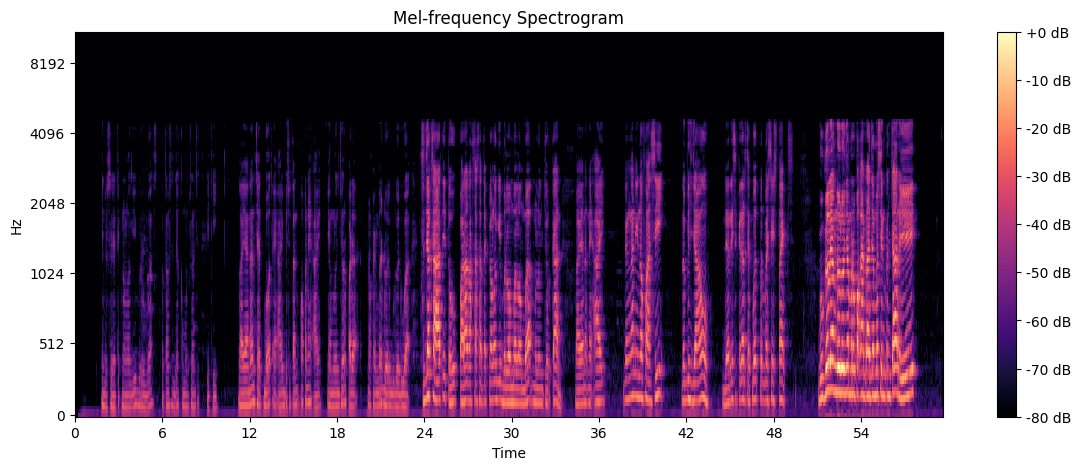

In [6]:
#visualisasi Spectrogram
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')
plt.title('Mel-frequency Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

Spektrogram memperlihatkan distribusi energi pada berbagai frekuensi sepanjang waktu. Pada bagian awal, energi hanya muncul pada frekuensi rendah dengan intensitas yang lemah. Seiring meningkatnya kekuatan suara, energi menyebar ke frekuensi menengah hingga tinggi. Bagian cempreng dan teriakan tampak memiliki konsentrasi energi besar di frekuensi tinggi, menandakan adanya komponen harmonik tajam. Pola ini menunjukkan peningkatan kompleksitas dan kekuatan frekuensi seiring bertambahnya intensitas suara.

In [9]:
#resampling to 16kHz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)
sr_resampled = 16000

#Compare durations
durasi_original = librosa.get_duration(y=y, sr=sr)  
durasi_resampled = librosa.get_duration(y=y_resampled, sr=sr_resampled)
print(f"Durasi Original: {durasi_original:.2f} detik")
print(f"Durasi Resampled: {durasi_resampled:.2f} detik")

Durasi Original: 27.37 detik
Durasi Resampled: 27.37 detik


In [ ]:
# Resampling ke 16 kHz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)
sr_new = 16000

# Bandingkan durasi
durasi_asli = librosa.get_duration(y=y, sr=sr)
durasi_resampled = librosa.get_duration(y=y_resampled, sr=sr_new)

print(f"Durasi Asli: {durasi_asli:.2f} detik")
print(f"Durasi Resampled: {durasi_resampled:.2f} detik")

Durasi Asli: 27.37 detik
Durasi Resampled: 27.37 detik


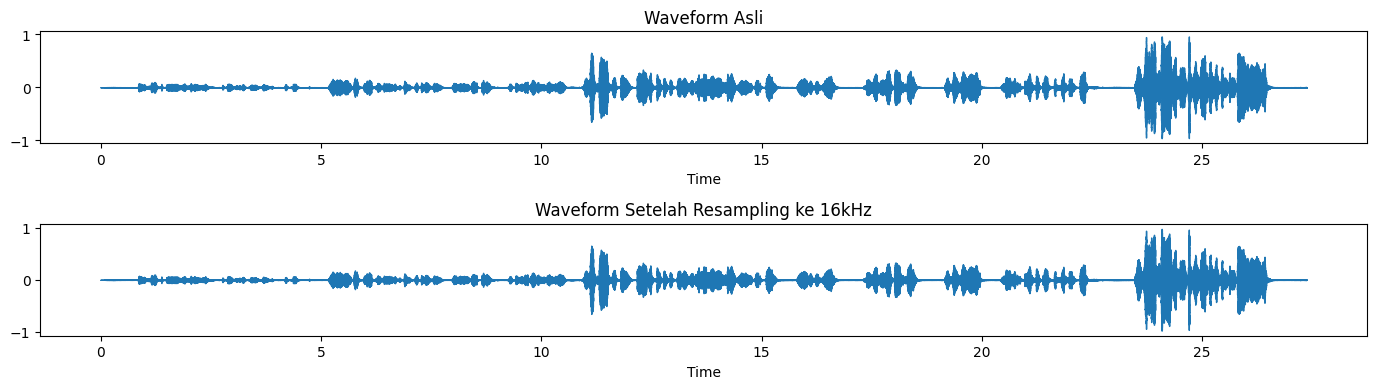

In [21]:
# Bandingkan waveform
plt.figure(figsize=(14, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform Asli")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_resampled, sr=sr_new)
plt.title("Waveform Setelah Resampling ke 16kHz")

plt.tight_layout()
plt.show()

Dari kedua waveform terlihat bahwa bentuk gelombangnya hampir sama antara audio asli dan hasil resampling ke 16 kHz. Hal ini menunjukkan bahwa isi dan urutan suara tidak berubah. Durasi audio juga tetap sama, jadi proses resampling tidak membuat suara menjadi lebih cepat atau lebih lambat. Perbedaan utamanya ada pada detail gelombang yang sedikit lebih halus pada hasil resampling karena jumlah sampel per detik berkurang. Akibatnya, kualitas suara bisa sedikit menurun di bagian frekuensi tinggi, tapi secara keseluruhan suara tetap terdengar sama dan jelas.

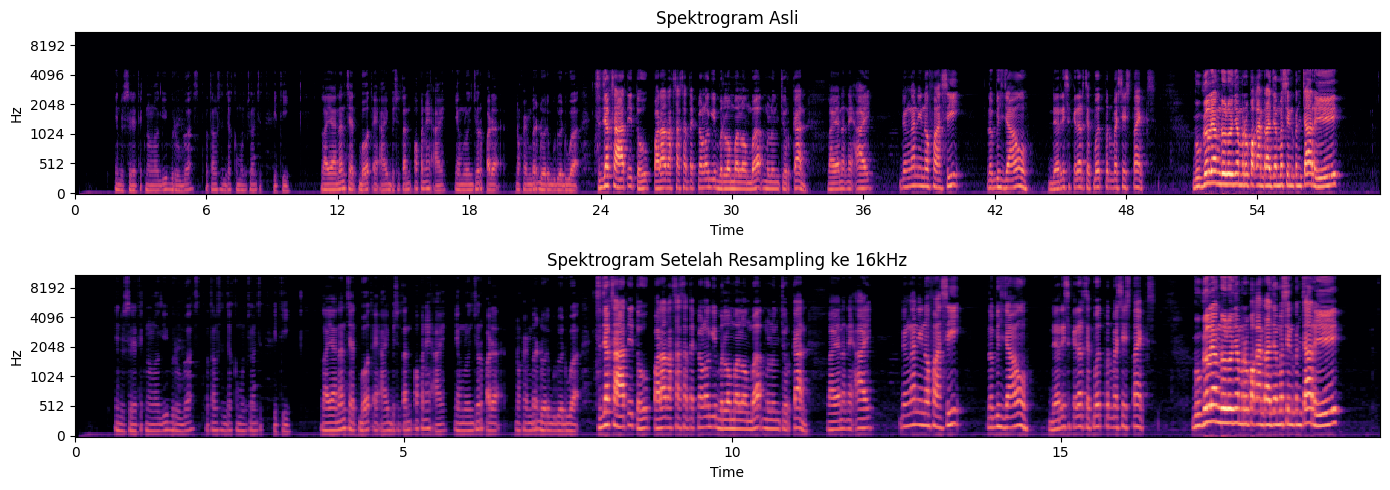

In [22]:
#bandingkan spektrogram
S_resampled = librosa.feature.melspectrogram(y=y_resampled, sr=sr_new)
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', x_axis='time')
plt.title("Spektrogram Asli")

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S_resampled, ref=np.max), y_axis='mel', x_axis='time')
plt.title("Spektrogram Setelah Resampling ke 16kHz")

plt.tight_layout()
plt.show()

# Tampilkan audio player hasil resampling
Audio(y_resampled, rate=sr_new)


Dari perbandingan dua spektrogram, terlihat bahwa pola warna dan bentuk antara audio asli dan hasil resampling ke 16 kHz hampir sama. Artinya, isi suara dan perubahan frekuensinya tetap terjaga. Perbedaannya hanya terlihat pada bagian frekuensi tinggi (di atas sekitar 8 kHz) yang sedikit berkurang pada hasil resampling. Hal ini wajar karena saat sample rate diturunkan, detail suara di frekuensi tinggi ikut berkurang. Secara keseluruhan, suara tetap terdengar sama dan kualitasnya tidak berubah banyak, hanya sedikit lebih “halus” atau tidak setajam versi aslinya di bagian nada tinggi.